## Phobia Detection Using Virtual Reality/ Augmented Reality


#citations:
1. Data set:
    https://www.researchgate.net/publication/329403546_Mental_Emotional_Sentiment_Classification_with_an_EEG-based_Brain-machine_Interface

2. Research Material: 
    https://www.researchgate.net/publication/335173767_A_Deep_Evolutionary_Approach_to_Bioinspired_Classifier_Optimisation_for_Brain-Machine_Interaction

3. J. J. Bird, L. J. Manso, E. P. Ribiero, A. Ekart, and D. R. Faria, “A study on mental state classification using eeg-based brain-machine     interface,”in 9th International Conference on Intelligent Systems, IEEE, 2018.

4. J. J. Bird, A. Ekart, C. D. Buckingham, and D. R. Faria, “Mental emotional sentiment classification with an eeg-based brain-machine interface,” in The International Conference on Digital Image and Signal Processing (DISP’19), Springer, 2019.

This research was part supported by the EIT Health GRaCE-AGE grant number 18429 awarded to C.D. Buckingham.


#Team Members: 
1. Avishkar Borkar
2. Harshal Makote
3. Sourabh Waghmode
4. Rushikesh Sapkal

## Why this project in particular ?
## What is the scope ?


The motivation behind this project is that in today’s age, thousands of people suffer from mental hardships and conditions. I wish to raise awareness for the mental battles people have to go through and how these issues are often ignored. The project uses machine learning algorithms, statistics and complex python libraries such as scikit-learn, TensorFlow, etc. to predict if an individual has a particular phobia or not. The intention behind the project is that people have hidden fears and is an excellent idea to gradually expose them to their fears in a virtually controlled environment so that they can be worked upon and then further medical assistance can be provided.

## Approaching The Machine Learning Model

1. Data Exploration
2. Data Preparation
3. Model Evaluation
4. Confirming Model

About Dataset

<p>The data was collected from two people (1 male, 1 female) for 3 minutes per state - positive, neutral, negative. We used a Muse EEG headband which recorded the TP9, AF7, AF8 and TP10 EEG placements via dry electrodes. Six minutes of resting neutral data is also recorded, the stimuli used to evoke the emotions are below<p>

Video inputs:

1. Marley and Me - **NEGATIVE** (Twentieth Century Fox) ---> Death Scene 

2. Up - **NEGATIVE** (Walt Disney Pictures) ---> Opening Death Scene

3. La La Land - **POSITIVE** (Summit Entertainment) ---> Opening musical number

4. Slow Life - **POSITIVE** (BioQuest Studios) ---> Nature timelapse

5. Funny Dogs - **POSITIVE** (MashupZone) ---> Funny dog clips



## 1. Data Exploration

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [304]:
data = pd.read_csv('emotions.csv')
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [305]:
data.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [306]:
data['label'].count()

2132

<BarContainer object of 2132 artists>

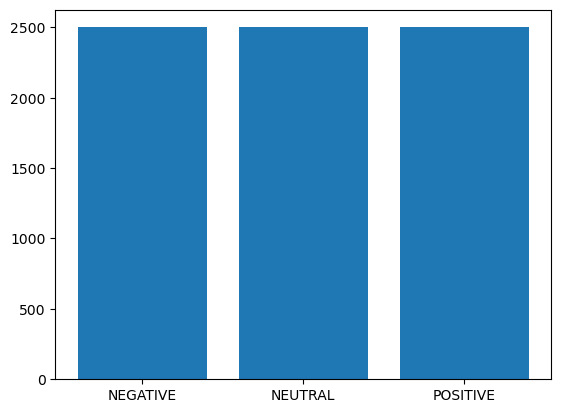

In [307]:
plt.bar(data['label'], height = 2500)

## 2. Data Preparation

In [308]:
data.isnull()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2128,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [309]:
null_count = data.isnull().sum().sum()
null_count

0

In [310]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

missing_values_table(data)

Your selected dataframe has 2549 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### As we have 0 null values, we will proceed with the model

In [311]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [312]:
x = data.drop(["label"] , axis=1)

#Scaling the data
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)    

#Encoding data
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
Y = data['label'].copy()

In [313]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.2)

## 3. Model Training/ Evaluation

In [314]:
final_scores = {'Support Vector Classifier' : [], 'Random Forest Classifier' : [], 'Extreme Gradient Boosting' : [], 'Logistic Regression' : []}


In [315]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [316]:
clf = svm.SVC(kernel='linear')
cv_scores = cross_val_score(clf, X, Y, cv=5)

# Evaluate the model
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
final_scores['Support Vector Classifier'].append(mean_accuracy)
std_deviation = cv_scores.std()
print('--------------------------------------------------------------------')
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print('--------------------------------------------------------------------')
print(f"Standard Deviation: {std_deviation:.2f}")

Cross-validation scores: [0.95784543 0.96252927 0.97183099 0.96948357 0.9600939 ]
--------------------------------------------------------------------
Mean Accuracy: 0.96
--------------------------------------------------------------------
Standard Deviation: 0.01


In [317]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
final_scores['Random Forest Classifier'].append(accuracy)
print(f'                      Accuracy: {accuracy:.2f}')
print('--------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print(report)

                      Accuracy: 0.99
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       1.00      1.00      1.00       148
           2       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



In [318]:


xgb = XGBClassifier(n_estimators = 15, max_depth = 5, learning_rate = 1)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
final_scores['Extreme Gradient Boosting'].append(accuracy)
print(f'                      Accuracy: {accuracy:.2f}')
print('--------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print(report)

                      Accuracy: 0.99
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       143
           1       1.00      1.00      1.00       148
           2       0.98      0.99      0.99       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



In [319]:

lr = LogisticRegression(max_iter = 999)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
final_scores['Logistic Regression'].append(accuracy)
print(f'                      Accuracy: {accuracy:.2f}')
print('--------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print(report)

                      Accuracy: 0.98
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       143
           1       1.00      0.99      1.00       148
           2       0.97      0.96      0.96       136

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427



## 4. Evaluating All The Models

In [320]:
print(final_scores)

{'Support Vector Classifier': [0.9643566315928357], 'Random Forest Classifier': [0.9882903981264637], 'Extreme Gradient Boosting': [0.990632318501171], 'Logistic Regression': [0.9765807962529274]}


In [321]:
for key, value in final_scores.items():
    print(f'{key} : {value}%')

Support Vector Classifier : [0.9643566315928357]%
Random Forest Classifier : [0.9882903981264637]%
Extreme Gradient Boosting : [0.990632318501171]%
Logistic Regression : [0.9765807962529274]%
